In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_datagen.flow_from_directory(r"C:\Users\vijay\OneDrive\Desktop\IBM-Project-24376-1659942131\Data Collection\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [5]:
x_test=test_datagen.flow_from_directory(r'C:\Users\vijay\OneDrive\Desktop\IBM-Project-24376-1659942131\Data Collection\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set',target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [7]:
model=Sequential()

In [8]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Flatten())

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [13]:
model.add(Dense(9,activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
len(x_train)

475

In [17]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
475/475 [==============================] - 1198s 3s/step - loss: 1.1329 - accuracy: 0.6391 - val_loss: 0.6507 - val_accuracy: 0.7673
Epoch 2/10
475/475 [==============================] - 644s 1s/step - loss: 0.5247 - accuracy: 0.8187 - val_loss: 0.4538 - val_accuracy: 0.8422
Epoch 3/10
475/475 [==============================] - 366s 771ms/step - loss: 0.3846 - accuracy: 0.8642 - val_loss: 0.4190 - val_accuracy: 0.8563
Epoch 4/10
475/475 [==============================] - 353s 742ms/step - loss: 0.3426 - accuracy: 0.8810 - val_loss: 0.4987 - val_accuracy: 0.8255
Epoch 5/10
475/475 [==============================] - 353s 742ms/step - loss: 0.2938 - accuracy: 0.8969 - val_loss: 0.2320 - val_accuracy: 0.9169
Epoch 6/10
475/475 [==============================] - 356s 750ms/step - loss: 0.2702 - accuracy: 0.9062 - val_loss: 0.1903 - val_accuracy: 0.9289
Epoch 7/10
475/475 [==============================] - 361s 759ms/step - loss: 0.2350 - accuracy: 0.9155 - val_loss: 0.3850 - val_

In [18]:
model.save('vegetables.h5')


In [19]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [20]:
model=load_model('vegetables.h5')

In [24]:
img=image.load_img(r"C:\Users\vijay\OneDrive\Desktop\IBM-Project-24376-1659942131\Data Collection\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___Bacterial_spot/adbfa5e7-23a5-4df0-9cae-1e54115619cb___NREC_B.Spot 1786.JPG")


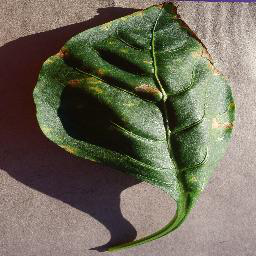

In [25]:
img

In [26]:
x=image.img_to_array(img)

In [28]:
img=image.load_img(r"C:\Users\vijay\OneDrive\Desktop\IBM-Project-24376-1659942131\Data Collection\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___Bacterial_spot/af2e0582-8683-4b26-a3e2-0e17b2de09c6___NREC_B.Spot 1848.JPG",target_size=(128,128))


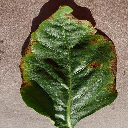

In [29]:
img

In [30]:
x=image.img_to_array(img)

In [31]:
x

array([[[171., 143., 131.],
        [123.,  95.,  83.],
        [162., 134., 122.],
        ...,
        [156., 127., 113.],
        [131., 102.,  88.],
        [179., 150., 136.]],

       [[121.,  93.,  81.],
        [158., 130., 118.],
        [130., 102.,  90.],
        ...,
        [181., 152., 138.],
        [141., 112.,  98.],
        [148., 119., 105.]],

       [[166., 138., 126.],
        [135., 107.,  95.],
        [128., 100.,  88.],
        ...,
        [162., 133., 119.],
        [149., 120., 106.],
        [125.,  96.,  82.]],

       ...,

       [[182., 169., 161.],
        [176., 163., 155.],
        [182., 169., 161.],
        ...,
        [204., 191., 182.],
        [204., 191., 182.],
        [190., 177., 168.]],

       [[191., 178., 170.],
        [184., 171., 163.],
        [187., 174., 166.],
        ...,
        [171., 158., 149.],
        [183., 170., 161.],
        [205., 192., 183.]],

       [[167., 154., 146.],
        [179., 166., 158.],
        [172., 1

In [32]:
x=np.expand_dims(x,axis=0)

In [33]:
x

array([[[[171., 143., 131.],
         [123.,  95.,  83.],
         [162., 134., 122.],
         ...,
         [156., 127., 113.],
         [131., 102.,  88.],
         [179., 150., 136.]],

        [[121.,  93.,  81.],
         [158., 130., 118.],
         [130., 102.,  90.],
         ...,
         [181., 152., 138.],
         [141., 112.,  98.],
         [148., 119., 105.]],

        [[166., 138., 126.],
         [135., 107.,  95.],
         [128., 100.,  88.],
         ...,
         [162., 133., 119.],
         [149., 120., 106.],
         [125.,  96.,  82.]],

        ...,

        [[182., 169., 161.],
         [176., 163., 155.],
         [182., 169., 161.],
         ...,
         [204., 191., 182.],
         [204., 191., 182.],
         [190., 177., 168.]],

        [[191., 178., 170.],
         [184., 171., 163.],
         [187., 174., 166.],
         ...,
         [171., 158., 149.],
         [183., 170., 161.],
         [205., 192., 183.]],

        [[167., 154., 146.],
       

In [34]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 1s 839ms/step


In [35]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [37]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']


In [38]:
index[y[0]]

'Tomato___Septoria_leaf_spot'

In [39]:
img=image.load_img(r"C:\Users\vijay\OneDrive\Desktop\IBM-Project-24376-1659942131\Data Collection\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___Bacterial_spot/b3f41636-2131-4a92-a65a-50ac160e9456___NREC_B.Spot 9213.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 134ms/step


'Tomato___Leaf_Mold'